In [1]:
import xlrd
ServicePath = xlrd.open_workbook("WebData/PingshanDemand.xlsx")
ServiceData = ServicePath.sheet_by_name("Pingshan")

In [2]:
import pymongo
from pymongo import MongoClient

In [51]:
import datetime

In [99]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontManager
plt.rcParams['font.sans-serif'] = ['SimHei']    # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False          # 解决保存图像是负号'-'显示为方块的问题

In [45]:
def countType(name, need):
    typeList = []
    typeNumber = {}
    for info in col.find(need):
        if not typeList.__contains__(info[name]):
            typeList.append(info[name])
            typeNumber[info[name]] = 1
        else:
            typeNumber[info[name]] = typeNumber[info[name]] + 1
    return typeNumber

In [177]:
need = {'EVENT_TYPE_NAME':'交通运输'}
# need = {'SUB_TYPE_NAME':'下水井盖'}
typeList = countType('SUB_TYPE_NAME', need)
print('Number of type' + str(len(typeList.keys())))
for t in typeList:
    print(str(typeList[t]) + ' ' + t)

Number of type5
1262 公共交通管理
318 道路规划建设
2 道路和公路交通安全
7 网约车管理
1 快递市场管理


In [196]:
et = '党纪政纪'
need = {'EVENT_TYPE_NAME': et}
values = []
communties = []
total = 0
# need = {}
sorted_x = sorted(countType('DISPOSE_UNIT_NAME', need).items(), key=lambda kv:(kv[1], kv[0]), reverse=True)
# sorted_x = sorted(countType('EVENT_TYPE_NAME', need).items(), key=lambda kv:(kv[1], kv[0]), reverse=True)

for t in sorted_x:
    total = total + t[1]
print(et + ' '+ str(total))
for t in sorted_x:
#     if 100*t[1] > total:
#         print(str(t[1]) + ' ' + t[0])
    print(str(t[1]) + ' ' + t[0])

党纪政纪 200
13 住房和建设局
12 教育局
12 卫生和计划生育局
11 人力资源局
10 市交警支队坪山大队
9 南布社区
8 规划土地监察大队
8 区委（区政府）办公室
7 环境保护和水务局
7 城管办（坑梓街道办事处）
6 综治维稳办公室（坪山街道办事处）
6 坪山公安分局
5 龙田街道综合执法队
4 马峦办事处综合执法队
4 群团工作部
4 区指挥中心处置
4 
3 经济和科技促进局
3 纪律检查工作委员会（马峦街道办事处）
3 纪工委（坑梓街道办事处）
3 竹坑社区
3 城市管理局
3 坪环社区（马峦街道办事处）
3 坪山区机关事务管理中心
3 区委政法委
2 纪律检查工作委员会（坪山街道办事处）
2 石井办事处综合执法队（石井街道办事处）
2 建筑工务局
2 市政服务中心（坪山街道办事处）
2 市政服务中心（坑梓街道办事处）
2 坪山街道综合执法队
2 区指挥中心
2 值班应急与智慧管理指挥分中心（龙田街道办事处）
1 马峦办事处综合执法队（马峦街道办事处）
1 综治维稳办公室（马峦街道办事处）
1 竹坑社区（龙田街道办事处）
1 碧岭社区（碧岭街道办事处）
1 石井社区工作站
1 环境水政监察二中队
1 消防安全管理委员会办公室（马峦街道办事处）
1 沙田社区（坑梓街道办事处）
1 沙湖社区
1 江岭社区
1 机关事务管理局
1 市规划和自然资源局坪山管理局
1 市政服务中心（龙田街道办事处）
1 市市场和质量监管委坪山局
1 安监办（坑梓街道办事处）
1 坪山自来水有限公司
1 坪山社区（坪山街道办事处）
1 坪山社区
1 坪山交通运输局
1 土地整备中心（碧岭办）
1 土地整备中心（石井街道办事处）
1 和平社区（坪山街道办事处）
1 和平社区
1 区委组织部
1 区委宣传部（文体旅游局）
1 劳动办（龙田街道办事处）
1 办公室（坪山街道办事处）
1 六联社区
1 公共服务办
1 人民武装部（马峦街道办事处）


In [138]:
# need = {'EVENT_TYPE_NAME':'市容环卫','STREET_NAME':'龙田街道'}
# need = {'EVENT_TYPE_NAME':'交通运输'}
need = {}
values = []
communties = []
# need = {}
sorted_x = sorted(countType('STREET_NAME', need).items(), key=lambda kv:(kv[1], kv[0]), reverse=True)
# sorted_x = sorted(countType('EVENT_TYPE_NAME', need).items(), key=lambda kv:(kv[1], kv[0]), reverse=True)
print('Number of type' + str(len(typeList.keys())))
for t in sorted_x:
    communties.append(t[0])
    values.append(t[1])
    print(str(t[1]) + ' ' + t[0])

Number of type59
9736 坪山街道
8756 龙田街道
7521 坑梓街道
4616 马峦街道
3605 碧岭街道
1591 石井街道
75 


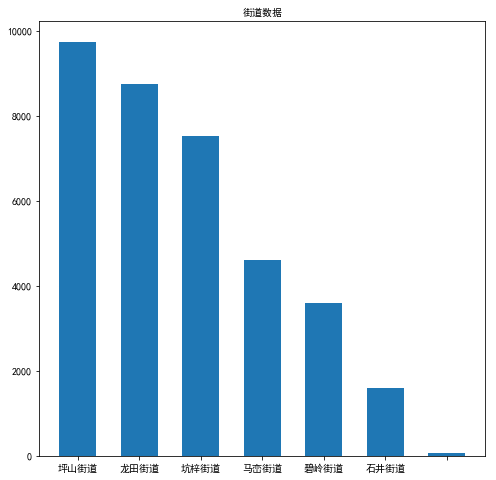

In [125]:
plt.figure(figsize=(8,8))
plt.bar(np.arange(len(values)),values,width=.6)
plt.xticks(np.arange(len(values)),communties)
plt.title("街道数据",fontsize = 10)
plt.show()